In [3]:
import pandas as pd
import pyarrow
import geopandas
import matplotlib.pyplot as plt
import raster2xyz
import matplotlib.colors as colors
#from mpl_toolkits.basemap import Basemap
import numpy as np
from itertools import chain

In [4]:
# from parquet to csv
file = pd.read_parquet('../Data/newdata_v2.parquet', engine = 'pyarrow')

In [6]:
file.head()

,lat,lon,label
0,42.059122,-125.292524,water
1,42.059122,-125.288031,water
2,42.059122,-125.283538,water
3,42.059122,-125.279044,water
4,42.059122,-125.274551,water


In [7]:
gdf = geopandas.GeoDataFrame(file, geometry=geopandas.points_from_xy(file.lon, file.lat))

In [17]:
gdf.head()

,lat,lon,label,geometry
0,-4.98565,106.360530,water,POINT (106.36053 -4.98565)
1,-4.98565,106.405485,water,POINT (106.40549 -4.98565)
2,-4.98565,106.450441,water,POINT (106.45044 -4.98565)
3,-4.98565,106.495396,water,POINT (106.49540 -4.98565)
4,-4.98565,106.540352,water,POINT (106.54035 -4.98565)


In [8]:
gdf['label'].value_counts()

water          661027
land           370977
burned           2234
active_fire       138
Name: label, dtype: int64

In [43]:
# gdf.to_file('../../finalproj_data/input_data/gdf.shp')

In [21]:
# Change to Numeric
gdf.loc[(gdf['label']=='water'), 'label'] = 0
gdf.loc[(gdf['label']=='land'), 'label'] = 1
gdf.loc[(gdf['label']=='burned'), 'label'] = 2
gdf.loc[(gdf['label']=='active_fire'), 'label'] = 3

In [22]:
gdf['label'].value_counts()

0    661027
1    370977
2      2234
3       138
Name: label, dtype: int64

In [ ]:
df = df.loc[:, ('type', 'tsneX', 'tsneY')

### Plot

In [16]:
gdf.crs = {'init': 'epsg:4326', 'no_defs': True}

gdf = gdf.to_crs(epsg=3857)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pyproj-3.0.dev1-py3.6-macosx-10.9-x86_64.egg/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [17]:
gdf['label'].value_counts()

land           3738049
water          1725997
fwi_high         12314
burned           11252
cloud              475
active_fire         53
Name: label, dtype: int64

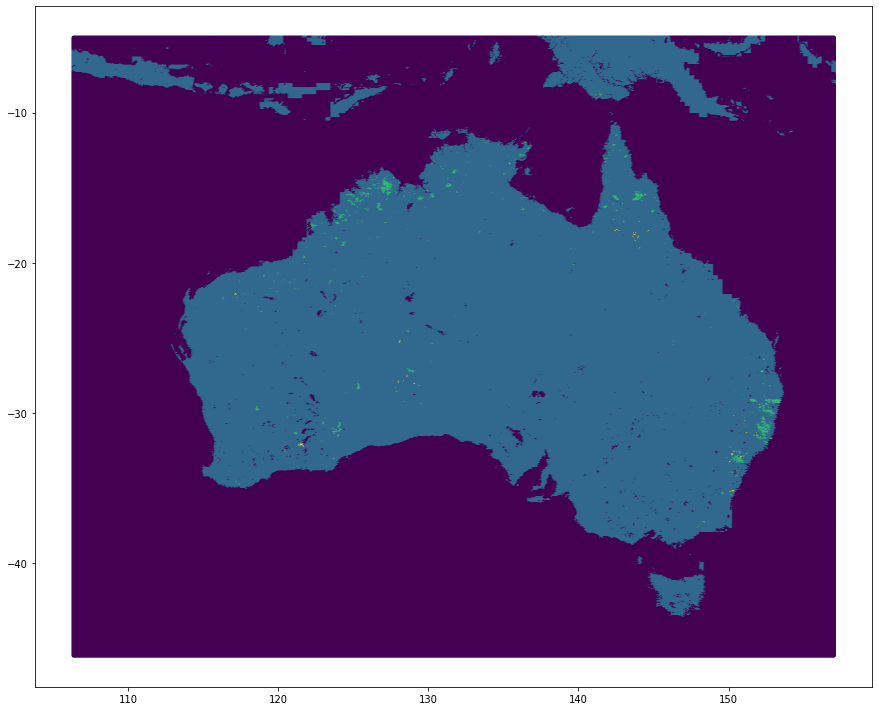

In [23]:
gdf.plot(['label'], markersize = 5, figsize = (15, 15))

# import model predictions

In [8]:
pred = geopandas.read_file('prediction_test.shp')

In [11]:
pred.head()

,Unnamed_ 0,prediction,geometry
0,0,land,POINT (-115.20049 36.12748)
1,1,land,POINT (-113.93337 32.85609)
2,2,land,POINT (-114.14905 34.64906)
3,3,land,POINT (-123.02788 40.29311)
4,4,burned,POINT (-123.20762 38.53159)


In [12]:
# Change to Numeric
pred.loc[(pred['prediction']=='water'), 'prediction'] = 0
pred.loc[(pred['prediction']=='land'), 'prediction'] = 1
pred.loc[(pred['prediction']=='burned'), 'prediction'] = 2
pred.loc[(pred['prediction']=='active_fire'), 'prediction'] = 3

In [13]:
pred

,Unnamed_ 0,prediction,geometry
0,0,1,POINT (-115.20049 36.12748)
1,1,1,POINT (-113.93337 32.85609)
2,2,1,POINT (-114.14905 34.64906)
3,3,1,POINT (-123.02788 40.29311)
4,4,2,POINT (-123.20762 38.53159)
...,...,...,...
1097623,1097623,0,POINT (-122.28648 36.98577)
1097624,1097624,0,POINT (-125.03640 34.26261)
1097625,1097625,0,POINT (-125.22512 37.80362)
1097626,1097626,2,POINT (-119.99488 38.10919)


In [ ]:
pred.plot(['prediction'], markersize = 5, figsize = (15, 15))

## Create slide for Features

In [52]:
df = pd.read_excel('../../featureimportance.xlsx')

In [53]:
df = df['Unnamed: 3'].value_counts()

In [54]:
for i in df.index:
    print(i)

Soil moisture
Soil temperature
Baseflow-groundwater runoff
Root zone soil moisture
Average surface skin temperature
Latent heat net flux
Potential evaporation rate
Snapshot of hourly precipitation rate adjusted to rain gauge
Total precipitation rate
Pressure
Air temperature
Wind speed
Plant canopy surface water
Albedo
Specific humidity
Downward long-wave radiation flux
Evapotranspiration
Net long-wave radiation flux
Net short wave radiation flux
Snapshot of hourly precipitation rate
Direct evaporation from bare soil


In [55]:
len(df.index)

21